# Ustruktureret data og text mining i Python

<img src="warn.png" width = 400>

I dag gives en generel introduktion til web scraping. I vil med disse værktøjer kunne gå direkte i gang med at indsamle data fra forskellige hjemmesider.

Legaliteten af web scraping er lidt af en gråzone, så man skal tænke sig om, inden man sætter scraping værktøjer i gang, da man nemt kan komme til at gøre ting, der er i strid med ophavsretsloven eller persondataloven.

### Web scraping og ophavsret/brugsbetingelser
De data, som virksomheder, organisationer o.l., lægger på hjemmesider, er ejet af disse virksomheder og organisationer. Mange hjemmesider har brugsbetingelser, der forbyder brug af scraping på deres hjemmesider. Dette blandt andet fordi, at man med scraping i princippet kan opstille en hjemmeside, der kopierer indhold direkte fra andre sider. Selvom det ikke er vores hensigt med den type scraping, som vi laver, så vil det stadig blive betragtet som et brud.

### Web scraping og persondata
Data på sociale medier er en gevaldig gråzone persondata-mæssigt: Er data, som personer frivilligt lægger offentligt på deres sociale medier, stadig deres data? I nogen tilfælde er svaret "ja", I andre er det "nej".
Derudover skal man være opmærksom på, at sider som Facebook, Twitter og Instagram også har betingelser skrevet ind for brug af deres data, da de er dataansvarlige for de data, som lægges op. Ved Facebook og Instagram er det fx ikke tilladt at automatisk indhente deres data.

### Web scraping og "hacking"
En hjemmeside befinder sig på en server. Hver gang en hjemmeside besøges, modtager serveren en henvendelse. Jo flere henvendelser, jo mere belastet bliver serveren. 
Fordi vi med Python meget nemt kan skrive kode, der gentager en kommando, kan man sende utroligt mange henvendelser på meget kort tid. 

***Dette vil for det meste bliver betragtet som et angreb og er ulovligt!***

# Hvad er ustruktureret data?

*Ustruktureret data* er data, som - kort sagt - ikke er sat i system. Hvis data ikke er struktureret, vil man typisk kalde det ustruktureret data. Tekst, billeder og video er typiske eksempler på ustruktureret data, da disse blot er rå information uden nogen måde at adskille en type information fra en anden. Mange moderne dataanalyseteknikker fokuserer på ustruktureret data, hvor man enten udvikler teknikker til at skabe overblik over ustruktureret data eller forsøger at give data en form for struktur.

Nedenstående er et eksempel på ustruktureret data:

```
["Hvorfor går man ikke i dialog med ⁦@DRC_dk⁩ i stedet for at opsige kontrakten uden varsel. Er det kun for at føre stærk mand politik? DRC yder en fremragende indsats på baggrund af den opgave de har fået #dkpol https://jyllands-posten.dk/indland/ECE12248020/tesfaye-forsoeger-sig-med-en-ny-loesning-paa-alle-udlaendingeministres-problem/ …",
"Alle tæller ❤️ https://twitter.com/cekicozlem/status/1276034922587832326 …",
"Det er så godt arbejde💚 https://twitter.com/fannybroholm/status/1275360842847080449 …",
"Tilfreds med den klima og energiaftale, der er lavet nu. Det er den første delaftale om at nå 70% reduktion i 2030. Særligt glad for at den indeholder principaftale om en CO2 afgiftsreform #dkpol #dkgreen pic.twitter.com/3slrMxLT5B",
"Godt første skridt for den fri natur #dkpol #dkgreen ⁦@alternativet_⁩ https://www.altinget.dk/miljoe/artikel/wermelin-lander-aftale-om-de-foerste-naturnationalparker …",
"Spændende udmelding. ⁦@alternativet_⁩ ønsker også en grøn   Klimaafgift, hvor udgangspunktet er at forureneren betaler #dkgreen #dkpol https://www.altinget.dk/artikel/venstre-og-radikale-laegger-faelles-pres-paa-regeringen-vil-have-ensartet-co2-afgift?SNSubscribed=true&ref=newsletter&refid=fredag-middag-190620&utm_campaign=altingetdk%20Altinget.dk&utm_medium%09=e-mail&utm_source=nyhedsbrev …",
"Så vigtigt at KL tager ansvar for den proces #dkpol #dkgreen https://www.altinget.dk/miljoe/artikel/professor-om-affaldsaftale-kl-og-kommunerne-skal-gribe-chancen-for-at-loese-tingene-selv …",
"Hurra - stor dag for Danmark💚👏🏼👏🏼 https://twitter.com/alternativet_/status/1273555055476723713 …",
"Til klimaforhandlinger i Finansministeriet. Vi sidder og diskuterer rammerne - de næste dage bliver intensive #dkpol #dkgreen @alternativet_ @ Christiansborg Palace  https://www.instagram.com/p/CBi3d0oB9lB/?igshid=ii78cjnx2n72 …",
"Aftale om mindre affald, mindre forbrænding og mere genbrug - god dag for klimaet og miljøet. 1. skridt i en stor miljøpakke #dkpol ⁦@alternativet_⁩ https://www.dr.dk/nyheder/indland/live-regeringen-praesenterer-ny-aftale-om-affald …"]
```

I ovenstående kan man stadig overføre ideen om observationer (i dette tilfælde tweets fra danske politikere), men der er ingen variable eller features givet på forhånd. Der er derfor ingen umiddelbar struktur at gøre brug af for at foretage sig analyser.

## Hvorfor er ustruktureret data interessant?

En rigtig stor del af det data, som produceres, er ustruktureret. Tænk på hvor meget data, der produceres på hjemmesider, sociale medier o.l. Det meste af dette er i form af tekst; altså ustruktureret. 


# Text mining og NLP

Fordi så meget data er i form af ustruktureret tekst, er der brug for metoder og teknikker til at behandle disse. Disse teknikker og metoder omtales overordnet som "text mining" og "natural language processing" (NLP). De to termer bruges lidt synonymt. "Text mining" er mest et dataanalyse term, mens NLP er en gren af computervidenskab. Groft sagt er forskellen, at NLP er videnskaben/metoder til at få en computer til at forstå tekst, mens "text mining" er analyseværktøjerne til at udlede mønstre i tekst.

In [1]:
# Installer spacy's danske sprogmodel
#! python -m spacy download da_core_news_sm

In [2]:
# Datahåndtering
import numpy as np
import pandas as pd

# NLP
import spacy
import string
from spacy.tokenizer import Tokenizer

# Web scraping
from bs4 import BeautifulSoup as bs
import requests

# Visualisering
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Sæt visualiseringsindstillinger
%matplotlib inline
sns.set(rc={'figure.figsize':(10,6)})

# Indlæs sprogmodel
nlp = spacy.load("da_core_news_sm")

# Ustruktureret data - et hurtigt overblik

Vi starter med et hurtigt eksempel, der gennemgår et typisk workflow med tekst mining (med lidt web scraping blandet ind i):

1. Tekst indlæses (her forsiden af TV2 nyheder)
2. Tekst udvælges (her selve nyhedsoverskrifterne på forsiden)
3. Tekst behandles ("tokenization")
    - Fjern stopord
    - Fjern tegnsætning
    - Udvalg af bestemt ordtype
4. Analyse foretages (her ordtælling og ordsky-visualisering)

Resten af lektionen bruges på at dykke ned i hvert af disse skridt

## 1. Tekst indlæses

`requests` bruges til at sende en forespørgsel til nyheder.tv2.dk. HTML-indholdet af siden gemmes i et objekt.

In [3]:
url = "https://nyheder.tv2.dk/"
url_content = requests.get(url).content

## 2. Tekst udvælges

`beautifulsoup` bruges til at finde specifikke dele af HTML'en. Her nyhedsoverskrifterne. Nyhedsoverskrifterne sættes derefter sammen til én string.

In [4]:
tv2_soup = bs(url_content)
texts = tv2_soup.find_all("a", class_ = "o-teaser_link")
texts = [text.get_text() for text in texts]
text = ''.join(texts)

## 3. Tekst behandles ("tokenization")

`spacy` bruges til at "tokenize" teksten; altså inddelen teksten i enkeltord, som er meningsfulde.

In [5]:
doc = nlp(text)
words = []

tokenizer = Tokenizer(nlp.vocab)
pos_tag = ['PROPN', 'ADJ', 'NOUN']
stopwords = list(nlp.Defaults.stop_words) + ["LIVE"]
punctuation = string.punctuation + "”"

for token in doc:
    
    if(token.text in stopwords or token.text in punctuation):
        continue
        
    if(token.pos_ in pos_tag):
        words.append(token.text)

## 4. Tekst analyseres

Med teksten omdannet til tokens, kan de nu optælles (ved at konvertere dem til en pandas series) og visualiseres.

### Ordtælling

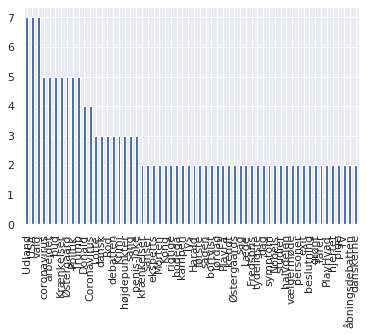

In [6]:
counts = pd.Series(words).value_counts()
counts = counts[counts > 1]

counts.plot.bar()

### Ordsky

Ordene kan også visualiseres i ordsky med pakken `wordcloud`, som også accepterer pandas.

(-0.5, 399.5, 199.5, -0.5)

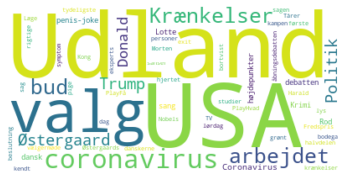

In [7]:
wc = WordCloud(background_color="white")
wc.fit_words(counts)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

# Data fra nettet - Web scraping

## Hvad er web scraping?

"Web scraping" er en paraplybetegnelse for automatiske teknikker til at indsamle information fra internettet (altså indsamling som ikke foregår via en browser).

At arbejde med web scraping involverer både at indsamle rådata fra internettet samt behandle og konvertere disse data til et format, som er til at arbejde med. 

## Hvorfor er web scraping relevant? (for samfundsvidenskaberne)

**1. Internettet er i sig selv et relevant genstandsfelt.**

Internettet er i dag fuldstændig integreret i vores hverdagsliv. Både information på internettet og vores brug af det giver indblik i vaner, forbrug, interaktion.

**2. Internettet er en datakilde**

Internettet er en stor samling af information. Vi har brug for teknikker til systematisk at indhente information derfra.

## Hvad er internettet *egentlig*? 

For at kunne arbejde med internettet, er det rart at have en grundlæggende forståelse for, hvad internettet egentlig er for en størrelse. 

Herunder nogen væsentlig punkter.

- Internettet: Et global system af forbundede computere og servere.
    - "Internet" forkortelse for "interconnected network"

- "(World Wide) Web" (WWW): En samling af ressourcer, som er tilgængelige via internettet 
    - "Webbet" kan betragtes som de navigerbare og offentlige dele af internettet

- Enhver computer eller server på internettet har et unik id i form af en IP-adresse (127.28.115.253)
    - IP: Internet Protocol

- Når man tilgår internettet via webbet, kontaktes andre computere og servere for at hente information.

- På webbet bruges "URL'er" til at give unikke (og læsbare) adresser til serverne.
    - URL: Uniform Ressource Locators

- Forbindelsen mellem IP-adresser og URL håndteres af DNS servere
    - DNS: Domain Name System

<img src="internet.png" alt="opte" width="600"/>

*Opte Project 2005*

## Sådan virker internettet ("the web") - Kort fortalt

![dns](dns.png)

*wpbeginner.com*

**Konsekvens: Internettet har ikke en samlet adressebog**

Fordi der er flere udbyder af DNS, domæner osv., er der ikke én samlet registrering af alle hjemmesider. Søgemaskiner som Google, DuckDuckGo og Bing skaber derfor deres egen "telefonbog" over internettet, så vi kan søge i det. 

De samme teknikker kan man selv genskabe i form af "crawlers" eller "spiders"

## Internettet gennem din browser versus gennem Python

### Internettet gennem din browser

![browser_img](website_browser.png)

Ovenstående er internettet, som I kender det (måske nogen kender den del af internettet lidt for godt). Hvordan ser det ud gennem Python?

### Internettet gennem Python

In [8]:
print(requests.get("https://www.reddit.com/r/PrequelMemes/").content[0:4000])

b'<!DOCTYPE html><html lang="en-US"><head><script>\n    var __SUPPORTS_TIMING_API = typeof performance === \'object\' && !!performance.mark && !! performance.measure && !!performance.getEntriesByType;\n    function __perfMark(name) { __SUPPORTS_TIMING_API && performance.mark(name); };\n    var __firstPostLoaded = false;\n    function __markFirstPostVisible() {\n      if (__firstPostLoaded) { return; }\n      __firstPostLoaded = true;\n      __perfMark("first_post_title_image_loaded");\n    }\n    var __firstCommentLoaded = false;\n    function __markFirstCommentVisible() {\n      if (__firstCommentLoaded) { return; }\n      __firstCommentLoaded = true;\n      __perfMark("first_comment_loaded");\n    }\n  </script><script>\n          __perfMark(\'head_tag_start\');\n        </script><title>reddit: the front page of the internet</title><meta charSet="utf-8"/><meta name="robots" content="noindex,nofollow"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="re

Sikke en rodebutik!

## Hvad betyder alt det her?

Det er værd at være opmærksom på, hvordan internettet egentlig hænger sammen, hvis vi forsøger at gøre noget med data fra det. Typisk er vores indgang til internettet gennem browsere eller apps, hvor alting er sat op sådan, at vi ikke behøver at forholde sig til disse ting.

Når vi arbejder med data fra internettet, er det altid data, som ligger et eller andet sted (på en server) ofte i et format, der i sin rå form ikke giver meget mening at arbejde med (rå HTML).

Der er derfor både fejlkilder i adgangen til data (forbindelser mellem servere kan svigte - også bare kortvarigt) og i håndteringen af det.

# Adgang til internettet via Python (`requests`)

Pakken `requests` bruges til at sende henvendelser over internettet. Herunder sendes en såkaldt "GET" request til nyheder.tv2.dk (når du besæger hjemmesider via en browser, sender din browser også GET requests).

In [9]:
import requests

url = "https://nyheder.tv2.dk/"
req = requests.get(url)

Kom vi igennem?

In [10]:
print(str(req.status_code), str(req.reason))

200 OK


Hvad indeholder siden?

In [11]:
content = req.content
print(content[0:1000])

b'<!DOCTYPE html>\n<html lang="da-DK" class="site-nyheder">\n<head>\n\n  <meta charset="utf-8"/>\n  <meta http-equiv="X-UA-Compatible" content="IE=edge"/>\n\n  <meta name="viewport" content="width=device-width,initial-scale=1.0"/>\n  <meta name="msapplication-TileImage" content="https://shared.tv2.dk/sites/all/themes/t2/img/apple-touch-icon-precomposed.png"/>\n  <meta name="msapplication-TileColor" content="#fff"/>\n  <meta name="format-detection" content="telephone=no"/>\n  <link rel="apple-touch-icon-precomposed" href="https://shared.tv2.dk/sites/all/themes/t2/img/apple-touch-icon-precomposed.png"/>\n  <link rel="shortcut icon" href="https://shared.tv2.dk/favicon.ico" />\n\n  <!-- inline base CSS -->\n  <style type="text/css" media="screen">\n    @charset "UTF-8";@font-face{font-family:AlrightSansLT-Regular;src:url(https://shared.tv2.dk/sites/all/themes/t2/fonts/AlrightSansLT-Regular.woff2) format("woff2"),url(https://shared.tv2.dk/sites/all/themes/t2/fonts/AlrightSansLT-Regular.woff

Det, som vi får, er hjemmesidens "rå" indhold; altså HTML.

## En hurtig introduktion til HTML

HTML er et helt kodesprog i sig selv og kan tage lang tid at mestre. Vi behøver dog kun et overordnet kendskab til dens opbygning for at kunne navigere i det.

- HTML består af "tags" afgrænset med `<>`
- Tags er altid struktureret i en træ-lignende hierarkisk struktur

Herunder en kort HTML string som eksempel:

In [12]:
html = '''
<html>
    <body>
        <div id="convo1">
            <p class="kenobi">Hello There!</p>
        </div>
        <div id="convo2">
            <p class="grievous">General Kenobi!</p>
        </div>
        <div id="convo3">
            <p class="kenobi">So Uncivilized!</p>
        </div>
    </body>
</html>
'''

In [13]:
print(html)


<html>
    <body>
        <div id="convo1">
            <p class="kenobi">Hello There!</p>
        </div>
        <div id="convo2">
            <p class="grievous">General Kenobi!</p>
        </div>
        <div id="convo3">
            <p class="kenobi">So Uncivilized!</p>
        </div>
    </body>
</html>



### HTML Tags

- Tags bruges til at indikere typen af indhold (p: paragraph, h1/h2/h3: heading 1/2/3, a: link, img: billede osv.)
- Tags indeholder forskellige "attributes":
    - Id'er: `<div id="div2">`
        - id's er for det meste unikke
    - Classes: `<div class="class!">`
        - Classes er for det meste ikke unikke
    - Andre eksempler: href (link), rel, type, title

## Naviger HTML med BeautifulSoup

https://www.crummy.com/software/BeautifulSoup/bs4/doc/

"BeautifulSoup" pakken er udviklet til at navigere i HTML. Den virker ved at omdanne html til et "soup"-objekt, hvor man kan pege på specifikke tags og udlede indhold.

Herunder omdannes HTML-strengen fra før til et soup objekt.

In [14]:
from bs4 import BeautifulSoup as bs

soup = bs(html, "html.parser")
print(soup.prettify())

<html>
 <body>
  <div id="convo1">
   <p class="kenobi">
    Hello There!
   </p>
  </div>
  <div id="convo2">
   <p class="grievous">
    General Kenobi!
   </p>
  </div>
  <div id="convo3">
   <p class="kenobi">
    So Uncivilized!
   </p>
  </div>
 </body>
</html>



Det ligner det samme stykke tekst, men der kan nu navigeres efter de forskellige tags.

Lad os starte med at se på, hvilke tags der er:

In [15]:
set(tag.name for tag in soup.find_all())

{'body', 'div', 'html', 'p'}

For at finde specifikke tags bruges metoderne `.find()` (første match) og `.find_all()` (alle matches). Første argument er tagget, som man leder efter. Man kan derefter specificerer andre argumenter for at indsnævre søgningen.

In [16]:
soup.find("p") # Finder første p tag

<p class="kenobi">Hello There!</p>

In [17]:
soup.find_all("p") # Finder alle p tags

[<p class="kenobi">Hello There!</p>,
 <p class="grievous">General Kenobi!</p>,
 <p class="kenobi">So Uncivilized!</p>]

`.get_text()` henter selve tekst-indholdet, som er inde i tagget (altså mellem `<p>` og `</p>`):

In [18]:
soup.find("p").get_text() # Tager teksten ud

'Hello There!'

In [19]:
texts = [] # Teksten for alle tags

for tag in soup.find_all("p"):
    texts.append(tag.get_text())
    
print(texts)

['Hello There!', 'General Kenobi!', 'So Uncivilized!']


Man kan som nævnt specificerer flere argumenter. `id = ` bruges til at finde et bestemt id, mens `class_ = ` bruges til at finde bestemt class.

In [20]:
soup.find("div", id = "convo2").get_text() # Find ud fra bestemt id

'\nGeneral Kenobi!\n'

In [21]:
soup.find("div", id = "convo2").get_text(strip = True) # Samme ovenstående, men fjerner whitespace (fx \n som indikerer ny linje)

'General Kenobi!'

In [22]:
soup.find("p", class_ = "kenobi").get_text() # Find ud fra bestemt klasse

'Hello There!'

### Find de rigtige tags

At finde de rigtige tags til at finde tekst ud fra kræver lidt forarbejde. Det nemmeste er ved at bruge "Code Inspector" funktionen, som findes i de fleste browsere. 

![inspector](inspector_tv.png)

HTML kan være meget rodet, så det involverer ofte at prøve sig lidt frem.

Bemærk fx at et tag kan indeholde flere klasser (adskilt med mellemrum). Dog behøver vi kun en af dem, for at matche det med BeautifulSoup.

På forsiden af indlandssektionen på nyheder.tv2.dk kan vi se, at overskrifter befinder sig i et `<a>` tag med klassen: `o-teaser_link`.

Denne klasse kan vi bruge til at matche overskrifterne.

Vi har allerede HTML-indholdet fra nyheder.tv2.dk læst ind som `content`, som vi kan konvertere til et soup-objekt:

In [23]:
soup = bs(content)

Vi kan derefter udlede overskrifter baseret på klassen.

Herunder den første overskrift:

In [24]:
soup.find("a", class_ = "o-teaser_link").get_text(strip = True)

'Kong Harald opereret i hjertet'

Vi kan med et for loop udlede alle overskrifterne:

In [25]:
for tag in soup.find_all("a", class_ = "o-teaser_link"):
    print(tag.get_text(strip=True))

Kong Harald opereret i hjertet
CoronavirusTab af sanser er det tydeligste symptom på coronavirus, viser studier
USA valg 2020Donald Trump har et nyt bud på, hvordan han fik coronavirus
KrimiPoliti søger vidner til knivstikkeri i Aalborg
SamfundKnap 700 forskere råber op om sexisme på universiteter
UdlandPaludan har fået anerkendt svensk statsborgerskab
Krænkelser på arbejdetLotte Rod bad selv Østergaard om at holde sagen hemmelig - indtil hun anklagede ham for at lyve
PolitikØstergaards exit var den rigtige beslutning, mener knap halvdelen af danskerne
USA valg 2020Donald Trump har et nyt bud på, hvordan han fik coronavirus
Krænkelser på arbejdetLotte Rod bad selv Østergaard om at holde sagen hemmelig - indtil hun anklagede ham for at lyve
CoronavirusLIVE30 personer bortvist fra bodega
PolitikTårer, sang og en penis-joke: Se otte højdepunkter fra åbningsdebatten
KrimiRetssag om hadforbrydelse og hærværk mod gravplads begynder
Krænkelser på arbejdetLigestillingsminister tager afstand ti

### Hvad med links?

Ofte i web scraping kan det give mening at indsamle links. På den måde kan man sætte "crawlers" op, der ...
1. Går til en hjemmeside
2. Indsamler indhold
3. Indsamler links
4. Indsamler indhold på hver side, som der linkes til
5. (gentag)

Links er altid med et `<a>` tag i en attribut `href`. Et tag kan have flere attributes (`id` og `class` er fx attributes). Med et soup objekt for et bestemt tag, kan man udlede et bestemt attribut med `[]`:

In [26]:
soup.find("a", class_ = "o-teaser_link")['href']

'/2020-10-09-lige-nu'

Der er i ovenstående tale om et relativt link (et, der bygger videre på hovedadressen: https://nyheder.tv2.dk/), så vi kan færdiggøre linket ved at paste det sammen:

In [27]:
"https://nyheder.tv2.dk" + soup.find("a", class_ = "o-teaser_link")['href']

'https://nyheder.tv2.dk/2020-10-09-lige-nu'

Hvis vi ser på selve HTML indholdet af et tag for en overskrift kan vi se, at der også er et title attribute:

In [28]:
soup.find("a", class_ = "o-teaser_link")

<a class="o-teaser_link" href="/2020-10-09-lige-nu" title="Kong Harald opereret i hjertet">
<header class="o-teaser_header">
<h2 class="o-teaser_headline font-h4">

           Kong Harald opereret i hjertet
          </h2>
</header>
</a>

Vi kan derfor alternativt udlede overskrifter på nyheder.tv2.dk med følgende (som giver et lidt pænere resultat):

In [29]:
for tag in soup.find_all("a", class_ = "o-teaser_link"):
    print(tag['title'])

Kong Harald opereret i hjertet
Tab af sanser er det tydeligste symptom på coronavirus, viser studier
Donald Trump har et nyt bud på, hvordan han fik coronavirus
Politi søger vidner til knivstikkeri i Aalborg
Knap 700 forskere råber op om sexisme på universiteter
Paludan har fået anerkendt svensk statsborgerskab
Lotte Rod bad selv Østergaard om at holde sagen hemmelig - indtil hun anklagede ham for at lyve
Østergaards exit var den rigtige beslutning, mener knap halvdelen af danskerne
Donald Trump har et nyt bud på, hvordan han fik coronavirus
Lotte Rod bad selv Østergaard om at holde sagen hemmelig - indtil hun anklagede ham for at lyve
 30 personer bortvist fra bodega
Tårer, sang og en penis-joke: Se otte højdepunkter fra åbningsdebatten
Retssag om hadforbrydelse og hærværk mod gravplads begynder
Ligestillingsminister tager afstand til kritik af Lotte Rod
Hvem får Nobels Fredspris i dag? Her er eksperts fem bud
Læge giver grønt lys - Trump vil holde vælgermøde lørdag
Rapperen Tory Lane

# ØVELSE: Basal web scraping

Lad os prøve at skrive et program, der finder overskrifter på Berlingske (https://www.berlingske.dk/nyheder).

1. Indlæs HTML-indholdet af forsiden af Berlingske med `requests.get(url).content` (husk at gemme det i et objekt)
2. Konverter HTML-indholdet til et soup-objekt med `bs(content)` (husk at gemme det i et objekt)
3. Print tekstindholdet af det første `<h4>` tag (brug `soup.find()` og `.get_text()`)

**BONUS**
4. Skriv et stykke kode, der udleder linket til den første artikel på https://www.berlingske.dk/nyheder (udforsk HTML enten direkte i python eller gennem din browser)

## LØSNING

# At arbejde med tekst data

Lad os arbejde lidt videre med artikeloverskrifter fra nyheder.tv2.dk, men først skal vi have lidt data at arbejde med.

Vi opbygger herunder en dictionary, der indeholder artikeloverskrifter og links. Vi konverterer derefter denne dictionary til en pandas dataframe.

In [30]:
url = "https://nyheder.tv2.dk/"
req = requests.get(url)
content = req.content
soup = bs(content)

ber_dict = {}
key = 0

for tag in soup.find_all("a", class_ = "o-teaser_link"):
    article_dict = {}
    article_dict["title"] = tag['title']
    article_dict["link"] = tag['href']
    ber_dict[key] = article_dict
    key = key + 1
    
article_data = pd.DataFrame.from_dict(ber_dict, orient = "index")

In [31]:
article_data.head()

,title,link
0,Kong Harald opereret i hjertet,/2020-10-09-lige-nu
1,Tab af sanser er det tydeligste symptom på cor...,//nyheder.tv2.dk/samfund/2020-10-09-tab-af-san...
2,"Donald Trump har et nyt bud på, hvordan han fi...",//nyheder.tv2.dk/udland/2020-10-09-donald-trum...
3,Politi søger vidner til knivstikkeri i Aalborg,//nyheder.tv2.dk/krimi/2020-10-09-politi-soger...
4,Knap 700 forskere råber op om sexisme på unive...,//nyheder.tv2.dk/samfund/2020-10-09-knap-700-f...


Hvor mange artikler indeholder corona?

In [32]:
article_data['title'].str.contains("corona", case = False).sum()

6

Hvor mange artikler indeholder Trump?

In [33]:
article_data['title'].str.contains("trump", case = False).sum()

6

Tilføjet som variabel:

In [34]:
article_data['corona'] = article_data['title'].str.contains("corona", case = False)
article_data['trump'] = article_data['title'].str.contains("trump", case = False)

article_data.head()

,title,link,corona,trump
0,Kong Harald opereret i hjertet,/2020-10-09-lige-nu,False,False
1,Tab af sanser er det tydeligste symptom på cor...,//nyheder.tv2.dk/samfund/2020-10-09-tab-af-san...,True,False
2,"Donald Trump har et nyt bud på, hvordan han fi...",//nyheder.tv2.dk/udland/2020-10-09-donald-trum...,True,True
3,Politi søger vidner til knivstikkeri i Aalborg,//nyheder.tv2.dk/krimi/2020-10-09-politi-soger...,False,False
4,Knap 700 forskere råber op om sexisme på unive...,//nyheder.tv2.dk/samfund/2020-10-09-knap-700-f...,False,False


Er der artikler om trump og corona?

In [35]:
article_data.loc[(article_data['corona'] == True) & (article_data['trump'] == True), :]

,title,link,corona,trump
2,"Donald Trump har et nyt bud på, hvordan han fi...",//nyheder.tv2.dk/udland/2020-10-09-donald-trum...,True,True
8,"Donald Trump har et nyt bud på, hvordan han fi...",//nyheder.tv2.dk/udland/2020-10-09-donald-trum...,True,True
41,"Donald Trump har et nyt bud på, hvordan han fi...",//nyheder.tv2.dk/udland/2020-10-09-donald-trum...,True,True


In [36]:
grouped_df = article_data.groupby(['corona', 'trump'])

grouped_df.size()

corona  trump
False   False    41
        True      3
True    False     3
        True      3
dtype: int64

# ØVELSE: Indhold i tekst

Datasættet 'pol-tweets-2020_sample.csv' (https://github.com/CALDISS-AAU/workshop_python-text-mining/raw/master/data/pol-tweets-2020_sample.csv) indholder et udtræk af 500 tilfældige tweets fra danske politikere.

1. Lav en variabel, der indikerer, om tweetet indeholder ordet "klima"
2. Find ud af hvor mange tweets, der nævner "klima"

**BONUS**
3. Skriv kode (fx en visualisering), der viser, hvem der snakker meget om klima

## LØSNING

Hvem snakker om klima?

# Udledning af nøgleord

Lad os vende tilbage til forsideartiklerne.

- Hvad bliver der særligt diskuteret i dag?
- Hvilke artikler behandler det mest diskuterede tema?

## Tokenization

"Tokenization" er et typisk skridt i behandlingen af tekst data. Tokenization er processen, der omdanner rå tekst til enkelte tekstenheder (tokens) - typisk i form af enkeltord.

Typiske skridt i tokenization:

1. Opdeling af tekst i enkeltord
2. Frasortering af tegnsætning
3. Evt. konverter til små bogstaver
4. Frasorter stopord
5. Evt. konverter til "stammen" (stemming eller lemmatization)

Der findes efterhånden mange værktøjer der kan udføre tokenization.

Først tager vi skridt 1-4 med mere basale Python kommandoer. Derefter ser vi på den "smarte" løsning.

### 1. Opdeling af tekst i enkeltord

In [37]:
heading = "Først ville Trump slet ikke forhandle, men nu vil han gerne lidt alligevel - og det koster point i valgkampen"

words = heading.split(" ")

words

['Først',
 'ville',
 'Trump',
 'slet',
 'ikke',
 'forhandle,',
 'men',
 'nu',
 'vil',
 'han',
 'gerne',
 'lidt',
 'alligevel',
 '-',
 'og',
 'det',
 'koster',
 'point',
 'i',
 'valgkampen']

### 2. Frasortering af tegnsætning

In [38]:
punct_list = [',', '-','.','?','!']

words_nopunct = []

for word in words:
    for punct in punct_list:
        word = word.replace(punct, "")
    words_nopunct.append(word)
    
words_nopunct = list(filter(None, words_nopunct))
words_nopunct

['Først',
 'ville',
 'Trump',
 'slet',
 'ikke',
 'forhandle',
 'men',
 'nu',
 'vil',
 'han',
 'gerne',
 'lidt',
 'alligevel',
 'og',
 'det',
 'koster',
 'point',
 'i',
 'valgkampen']

### 3. Konverter til små bogstaver

In [39]:
words_lower = [word.lower() for word in words_nopunct]
words_lower

['først',
 'ville',
 'trump',
 'slet',
 'ikke',
 'forhandle',
 'men',
 'nu',
 'vil',
 'han',
 'gerne',
 'lidt',
 'alligevel',
 'og',
 'det',
 'koster',
 'point',
 'i',
 'valgkampen']

### 4. Frasorter stopord

In [40]:
stopwords = ['først', 'ville', 'slet', 'ikke', 'men', 'nu', 'vil', 'han', 'gerne', 'lidt', 'alligevel', 'og', 'det', 'koster', 'i']

tokens = []

for word in words_lower:
    if word not in stopwords:
        tokens.append(word)
        
tokens

['trump', 'forhandle', 'point', 'valgkampen']

### 5. Stemming / lemmatization

Formålet med tokenization er både at frasortere støj i teksten og ensrette tokens sådan, at der kun er ét token for alle ord med samme semantiske betydning.

Fx er det uhensigtsmæssigt at behandle "Valgkamp" og "valgkamp" som to forskellige tokens, da det er det samme ord bare med stort og lille forbogstav.

Netop fordi hvert ord som udgangspunkt behanldes som unikt, giver det nogen udfordring ift. grammatik, da hver ordbøjning bliver hver sit token - medmindre man gør noget ved det!

Derfor er en typisk praksis enten at konvertere ordet til stammen (stemming). Her ville ord som "koste", "koster", "kostede" alle konverteres til "kost", da det er ordets stamme.

En anden praksis er at konvertere til navneformen (lemmatization). Her ville ord som "koste", "koster", "kostede" alle konverteres til "koste", da det er navneform for ordet.

Sådanne konverteringer kræver, at man bruger i forvejen trænede sprogmodeller, da stamme og navneform vil variere fra sprog til sprog. Heldigvis er der udviklet mange af disse værktøjer.

Dog er sådan nogen værktøjer ikke uden fejl, da det tager lang tid for en computer at lære, hvad forskellen er på "kost" (noget man spiser), "kost" (noget man fejer med) og "kost" (stammen at verbum "koste").

### Tokenization med spacy

Ovenstående er en noget langsommelige proces. Lad os prøve med en tokenizer fra pakken "spacy".

In [41]:
nlp = spacy.load("da_core_news_sm") # Indlæsning af dansk sprogmodel

doc = nlp(heading) # Behandling af tekststykke med sprogmodel

Print af de umiddelbart udledte tokens:

In [42]:
for token in doc:
    print(token.text)

Først
ville
Trump
slet
ikke
forhandle
,
men
nu
vil
han
gerne
lidt
alligevel
-
og
det
koster
point
i
valgkampen


Tokens lemmatiseret:

In [43]:
for token in doc:
    print(token.lemma_)

Først
ville
Trump
slette
ikke
forhandle
,
men
nu
ville
han
gerne
lidt
alligevel
-
og
det
koste
point
i
valgkamp


Hvilken ordklasse er ordene? (her er der nogen fejl)

In [44]:
for token in doc:
    print('{0:10.10} {1}'.format(token.text, token.pos_))

Først      ADV
ville      AUX
Trump      VERB
slet       ADV
ikke       ADV
forhandle  VERB
,          PUNCT
men        CCONJ
nu         ADV
vil        AUX
han        PRON
gerne      ADV
lidt       ADJ
alligevel  ADV
-          PUNCT
og         CCONJ
det        PRON
koster     VERB
point      NOUN
i          ADP
valgkampen NOUN


**VIDENSCHECK**: Kan I spotte nogen fejlklassificeringer?

Med sprogmodellen i spacy følger i øvrigt en prædefineret stopordsliste:

In [45]:
list(nlp.Defaults.stop_words)[0:10]

['ny',
 'ind',
 'andet',
 'indtil',
 'end',
 'næste',
 'lave',
 'som',
 'imens',
 'først']

Fra standardpakken `string` kan vi skaffe tegnsætning:

In [46]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Med disse værktøjer kan vi danne vores token-liste på følgende måde. Vi kan samtidig filtere efter bestemte ordklasser:

In [47]:
tokens = []

tokenizer = Tokenizer(nlp.vocab) # Indlæsning af tokenizer
pos_tag = ['PROPN', 'ADJ', 'NOUN'] # Beholder adjektiver og navneord
stopwords = list(nlp.Defaults.stop_words)
punctuation = string.punctuation + "”"

for token in doc:
    
    if(token.text.lower() in stopwords or token.text in punctuation):
        continue
        
    if(token.pos_ in pos_tag):
        tokens.append(token.text.lower())

Tilbage står vi (med denne sortering) med følgende meningsfulde tokens:

In [48]:
tokens

['point', 'valgkampen']

## Udled nøgleord - liste tilgang

Lad os nu kombinere ovenstående til at udlede nøgleord af avisartiklerne. Vi kan samtidig filtere efter bestemte ordklasser.

In [49]:
article_data.head()

,title,link,corona,trump
0,Kong Harald opereret i hjertet,/2020-10-09-lige-nu,False,False
1,Tab af sanser er det tydeligste symptom på cor...,//nyheder.tv2.dk/samfund/2020-10-09-tab-af-san...,True,False
2,"Donald Trump har et nyt bud på, hvordan han fi...",//nyheder.tv2.dk/udland/2020-10-09-donald-trum...,True,True
3,Politi søger vidner til knivstikkeri i Aalborg,//nyheder.tv2.dk/krimi/2020-10-09-politi-soger...,False,False
4,Knap 700 forskere råber op om sexisme på unive...,//nyheder.tv2.dk/samfund/2020-10-09-knap-700-f...,False,False


In [50]:
headings = ' '.join(list(article_data['title'])) # Al tekst samles i en string

In [51]:
doc = nlp(headings)

tokens = []

tokenizer = Tokenizer(nlp.vocab) # Indlæsning af tokenizer
pos_tag = ['PROPN', 'ADJ', 'NOUN'] # Beholder adjektiver og navneord
stopwords = list(nlp.Defaults.stop_words)
punctuation = string.punctuation + "”"

for token in doc:
    
    if(token.text.lower() in stopwords or token.text in punctuation):
        continue
        
    if(token.pos_ in pos_tag):
        tokens.append(token.text.lower())
        
tokens[0:10]

['harald',
 'hjertet',
 'tab',
 'sanser',
 'tydeligste',
 'symptom',
 'coronavirus',
 'studier',
 'donald',
 'trump']

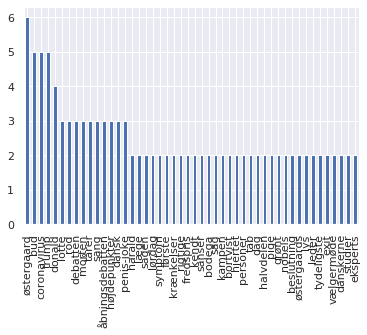

In [52]:
token_series = pd.Series(tokens)

counts = token_series.value_counts()
counts = counts[counts > 1]

counts.plot.bar()

Og med ordsky:

(-0.5, 399.5, 199.5, -0.5)

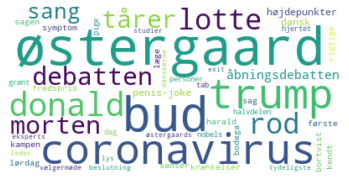

In [53]:
wc = WordCloud(background_color="white")
wc.fit_words(counts)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

## Udled nøgleord - tidy data tilgang

Ulempen ved ovenstående tilgang er, at det kan blive vanskeligt at koble teksten tilbage til oprindelige data.

En måde, at udføre tekstanalyser, men hvor man samtidig holder data struktureret, er ved at få data ændret på sådan en måde, at man kan koble ordbrug til bestemte tekster. 

Dette er et eksempel på en tidy data tilgang. Tidy data dikterer, at hver række i et datasæt skal være en unik observation.
Til arbejde med tekst opnår vi en del fleksibilitet ved at få et datasæt, hvor hver række indeholder:
- Teksten (fx en overskrift eller et tweet)
- Baggrundsinformation om teksten (evt. dato eller navn på twitter-bruger)
- Ordet i teksten

Det giver hurtigt et meget stort datasæt, men det har mange fordele i det senere analyse arbejde.

In [54]:
article_data.head()

,title,link,corona,trump
0,Kong Harald opereret i hjertet,/2020-10-09-lige-nu,False,False
1,Tab af sanser er det tydeligste symptom på cor...,//nyheder.tv2.dk/samfund/2020-10-09-tab-af-san...,True,False
2,"Donald Trump har et nyt bud på, hvordan han fi...",//nyheder.tv2.dk/udland/2020-10-09-donald-trum...,True,True
3,Politi søger vidner til knivstikkeri i Aalborg,//nyheder.tv2.dk/krimi/2020-10-09-politi-soger...,False,False
4,Knap 700 forskere råber op om sexisme på unive...,//nyheder.tv2.dk/samfund/2020-10-09-knap-700-f...,False,False


Funktion til at danne tokens:

In [55]:
def tokenize_function(text):
    doc = nlp(text)

    tokens = []

    tokenizer = Tokenizer(nlp.vocab) # Indlæsning af tokenizer
    pos_tag = ['PROPN', 'ADJ', 'NOUN'] # Beholder adjektiver og navneord
    stopwords = list(nlp.Defaults.stop_words)
    punctuation = string.punctuation + "”"

    for token in doc:
    
        if(token.text.lower() in stopwords or token.text in punctuation):
            continue

        if(token.pos_ in pos_tag):
            tokens.append(token.text.lower())
        
    return(tokens)

Funktionen bruges:

In [56]:
article_data['tokens'] = article_data['title'].apply(tokenize_function)

article_data.head()

,title,link,corona,trump,tokens
0,Kong Harald opereret i hjertet,/2020-10-09-lige-nu,False,False,"[harald, hjertet]"
1,Tab af sanser er det tydeligste symptom på cor...,//nyheder.tv2.dk/samfund/2020-10-09-tab-af-san...,True,False,"[tab, sanser, tydeligste, symptom, coronavirus..."
2,"Donald Trump har et nyt bud på, hvordan han fi...",//nyheder.tv2.dk/udland/2020-10-09-donald-trum...,True,True,"[donald, trump, bud, coronavirus]"
3,Politi søger vidner til knivstikkeri i Aalborg,//nyheder.tv2.dk/krimi/2020-10-09-politi-soger...,False,False,"[politi, vidner, knivstikkeri, aalborg]"
4,Knap 700 forskere råber op om sexisme på unive...,//nyheder.tv2.dk/samfund/2020-10-09-knap-700-f...,False,False,"[forskere, råber, sexisme, universiteter]"


Metoden `.explode()` splitter værdier i en liste og danner en ny række for hver værdi. På den måde opnås et tidy data sæt:

In [57]:
article_data = article_data.explode(column = 'tokens')

article_data.head()

,title,link,corona,trump,tokens
0,Kong Harald opereret i hjertet,/2020-10-09-lige-nu,False,False,harald
0,Kong Harald opereret i hjertet,/2020-10-09-lige-nu,False,False,hjertet
1,Tab af sanser er det tydeligste symptom på cor...,//nyheder.tv2.dk/samfund/2020-10-09-tab-af-san...,True,False,tab
1,Tab af sanser er det tydeligste symptom på cor...,//nyheder.tv2.dk/samfund/2020-10-09-tab-af-san...,True,False,sanser
1,Tab af sanser er det tydeligste symptom på cor...,//nyheder.tv2.dk/samfund/2020-10-09-tab-af-san...,True,False,tydeligste


Data er nu klar til at foretage forskellige optællinger. 

Hyppigste tokens:

In [58]:
article_data['tokens'].value_counts()

østergaard               6
bud                      5
coronavirus              5
trump                    5
donald                   4
                        ..
kirgistans               1
hadforbrydelse           1
ligestillingsminister    1
skud                     1
stemmeboksene            1
Name: tokens, Length: 146, dtype: int64

Tælling af tokens per titel:

In [59]:
article_data.groupby(['title', 'tokens']).size()

title                                                                                tokens     
 30 personer bortvist fra bodega                                                     bodega         2
                                                                                     bortvist       2
                                                                                     personer       2
'Teori' kendt fra ny dansk film – hvad skal du drikke for at holde promille på 0,5?  dansk          1
                                                                                     film           1
                                                                                                   ..
Østergaards exit var den rigtige beslutning, mener knap halvdelen af danskerne       danskerne      2
                                                                                     exit           2
                                                                                     ha

### "Hotte" emner

Lad os se, om vi kan udlede hvilke artikler, der skriver om dagens populære emner (ud fra overskrift).

In [60]:
hot_topics = list(article_data['tokens'].value_counts().index[0:5])
hot_topics

['østergaard', 'bud', 'coronavirus', 'trump', 'donald']

Nedenstående danner logiske variabel "hot_topic". Den er dannet ved at gå igennem hvert ord i `hot_topics` og tjekke, om titlen indeholder dette ord.

In [61]:
article_data['hot_topic'] = False

for topic in hot_topics:
    article_data.loc[article_data['hot_topic'] != True, 'hot_topic'] = article_data.loc[article_data['hot_topic'] == False, 'title'].str.contains(topic)

article_data.head()

,title,link,corona,trump,tokens,hot_topic
0,Kong Harald opereret i hjertet,/2020-10-09-lige-nu,False,False,harald,False
0,Kong Harald opereret i hjertet,/2020-10-09-lige-nu,False,False,hjertet,False
1,Tab af sanser er det tydeligste symptom på cor...,//nyheder.tv2.dk/samfund/2020-10-09-tab-af-san...,True,False,tab,True
1,Tab af sanser er det tydeligste symptom på cor...,//nyheder.tv2.dk/samfund/2020-10-09-tab-af-san...,True,False,sanser,True
1,Tab af sanser er det tydeligste symptom på cor...,//nyheder.tv2.dk/samfund/2020-10-09-tab-af-san...,True,False,tydeligste,True


Vi kan derefter visualisere de hyppigste ord for de artikler, som omhandler de populære emner:

(-0.5, 399.5, 199.5, -0.5)

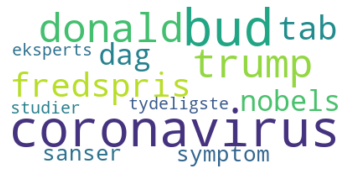

In [62]:
hot_count = article_data.loc[article_data['hot_topic'] == True, :]['tokens'].value_counts()

wc = WordCloud(background_color="white")
wc.fit_words(hot_count)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

# ØVELSE: Nøgleord fra tweets

Udled nøgleord af datasættet "pol-tweets-2020_sample" (link).

Undersøg hvem der særligt tweeter om nøgleordene.


## LØSNING - Liste tilgang

## LØSNING - tidy data tilgang

## LØSNING - BONUS

# ØVELSE: Nøgleord fra overskrifter

Udled nøgleord (mest populære tokens) af overskrifterne på Berlingske (https://www.berlingske.dk/nyheder).